# Introduction

Across the globe, lung cancer is the number one cause of death from cancer. Among all lung cancers, adenocarcinoma is the most frequent type. It falls under the category of non-small-cell lung cancer (NSCLC) (Keita Maemura et al., 2018).

MicroRNA editing, specifically the conversion of adenosine to inosine (A-to-I), has been linked to tumor characteristics across different cancer forms. Recent examinations of The Cancer Genome Atlas (TCGA) data have identified numerous microRNAs subject to A-to-I editing in human cancer samples, with some of them implicated in prognostic outcomes (Keita Maemura et al., 2018).

My main objective is to create diverse machine learning models for classifying whether an individual has cancer based on miRNA editing expressions. I kickstart this process by conducting Exploratory Data Analysis (EDA), employing data visualization techniques, and ensuring thorough data cleaning, including the removal of duplicates and handling null values.

To achieve my goal, I plan to utilize various machine learning algorithms such as XGBoost, K-Nearest Neighbors (KNN), Random Forest (RF), Support Vector Machine (SVM), Logistic Regression, Gradient Boosting, and Decision Tree. The next step involves conducting a comparative analysis among these models, assessing their performance metrics to identify the most accurate approach for cancer classification.

After completing model training and evaluation, I'll proceed with model deployment. I'll select the model with the highest accuracy for deployment using Streamlit. Additionally, I'll implement an iterative refinement process by initially working with the entire dataset and then focusing on the top important features identified through feature selection techniques. This iterative approach aims to further improve the accuracy and reliability of the models in cancer detection.

### Dataset overview

The dataset consists of 2568 different miRNA expressions measured across 38 samples, with the first 19 representing diseased individuals and the remaining 19 serving as control samples. This division is paramount as it enables comparative analysis between diseased and control groups, facilitating the identification of miRNA patterns associated with the disease and providing insights into its molecular mechanisms. By including control samples, researchers can validate findings, ensuring robustness and generalizability of results. Moreover, this balanced representation aids in the development of accurate machine learning models for classification tasks, with clinical implications ranging from early disease detection to the identification of therapeutic targets.

Link to metadata: https://www.ncbi.nlm.nih.gov/Traces/study/?acc=PRJNA1022393&o=acc_s%3Aa

# Task 1: Data Exploration and Pre-processing

Data exploration and preprocessing are crucial initial steps in the data analysis workflow, laying the foundation for subsequent tasks. Through exploration, we gain a comprehensive understanding of the dataset's structure, distribution, and relationships, enabling us to uncover patterns, anomalies, and insights that may inform subsequent analysis decisions. Preprocessing tasks, including handling missing values, outliers, and inconsistencies, are essential for ensuring data quality and integrity, mitigating the risk of biased results and inaccurate conclusions. Furthermore, preprocessing facilitates feature engineering, where we transform or create new features to improve model performance. By addressing noise, outliers, and irrelevant features, preprocessing enhances the predictive power of models, leading to more accurate and robust results.

## Import libraries

**Brief on all libraries used:**

import pandas as pd: Pandas is used for data manipulation and analysis. It provides data structures and functions to efficiently manipulate large datasets.

import numpy as np: NumPy is a library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

import matplotlib.pyplot as plt: Matplotlib is a plotting library for creating static, interactive, and animated visualizations in Python. It provides a MATLAB-like interface and is widely used for data visualization.

import seaborn as sns: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

import warnings: The warnings module is used to handle warnings raised during program execution. In this case, it's used to suppress warning messages.

from sklearn.model_selection import train_test_split: This function is used to split datasets into training and testing sets for model evaluation.

from sklearn.linear_model import LogisticRegression: Logistic Regression is a linear classification algorithm used for binary classification tasks.

from sklearn.linear_model import LogisticRegressionCV: Logistic RegressionCV is a logistic regression classifier with built-in cross-validation to find the optimal regularization parameter.

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report: These functions are used to evaluate the performance of classification models by computing accuracy, confusion matrix, and classification report.

from sklearn.preprocessing import StandardScaler, RobustScaler: StandardScaler and RobustScaler are used for standardization and robust scaling of numerical features, respectively.

from sklearn.svm import SVC: SVC stands for Support Vector Classifier, which is used for classification tasks using Support Vector Machines.

from sklearn.inspection import permutation_importance: permutation_importance is used to compute permutation-based feature importance scores.

from sklearn.model_selection import GridSearchCV: GridSearchCV is used for hyperparameter tuning by exhaustively searching through a specified parameter grid.

from sklearn.model_selection import cross_val_score: cross_val_score is used for cross-validation, providing an efficient way to evaluate model performance on multiple splits of the data.

import pickle: Pickle is used for serializing and deserializing Python objects. It's often used for saving trained machine learning models to disk for later use.

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [333]:
data = pd.read_excel('LUAD cancer.xlsx')

print(data.head())

                ID                     SEQ  383-1B  408-1C  411-1C  412-1C  \
0  hsa-let-7a-2-3p  ctgtacagcctcctagctttcc      47       7      33     196   
1    hsa-let-7a-3p   ctatacaatctactgtctttc     848     786    1270    1369   
2    hsa-let-7a-5p  tgaggtagtaggttgtatagtt  324483  418083  421575  534868   
3    hsa-let-7b-3p  ctatacaacctactgccttccc       0       0       0       0   
4    hsa-let-7b-5p  tgaggtagtaggttgtgtggtt  190508  247611  241926  249987   

   414-1C  416-1C  417-1C  419-1C  ...  426-3C  433-3C  453-3C  466-3C  \
0      56      31      20      35  ...      25      15      13      19   
1    1747     610    1306     836  ...     595     596     598     657   
2  353048  225574  579816  417262  ...  416889  368544  463867  383537   
3       0       0       0       0  ...       1       0       0       1   
4  251073  123530  317137  215299  ...  270791  175419  203461  227802   

   472-3C  473-3C  474-3C  475-3C  478-3C  480-3C  
0      49      18      33      10 

In order to work freely on our dataset, we're going to have to transpose it!

In [334]:
transposed_data = data.transpose()

print(transposed_data.head())

                          0                      1                       2     \
ID             hsa-let-7a-2-3p          hsa-let-7a-3p           hsa-let-7a-5p   
SEQ     ctgtacagcctcctagctttcc  ctatacaatctactgtctttc  tgaggtagtaggttgtatagtt   
383-1B                      47                    848                  324483   
408-1C                       7                    786                  418083   
411-1C                      33                   1270                  421575   

                          3                       4     \
ID               hsa-let-7b-3p           hsa-let-7b-5p   
SEQ     ctatacaacctactgccttccc  tgaggtagtaggttgtgtggtt   
383-1B                       0                  190508   
408-1C                       0                  247611   
411-1C                       0                  241926   

                          5                       6     \
ID               hsa-let-7c-3p           hsa-let-7c-5p   
SEQ     ctgtacaaccttctagctttcc  tgaggtagtaggttgt

In [4]:
y = [1] * 19 + [0] * 19

# Convert y to a DataFrame
y_df = pd.DataFrame({'Target': y})

# Concatenate transposed_data and y as columns
data_with_target = pd.concat([transposed_data, y_df], axis=1)

The aim of this step is to add a target variable where the first 19 samples are diseased, and the last 19 are control.

In [337]:
data = pd.read_excel('TargetData.xlsx')
data.head()

,hsa-let-7a-2-3p,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,...,hsa-miR-9-5p,hsa-miR-96-3p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-98-5p,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-3p,hsa-miR-99b-5p,Target
0,47,848,324483,0,190508,8,13652,1587,20331,243,...,196,0,13940,0,13654,29,58212,226,25170,1
1,7,786,418083,0,247611,9,18496,2825,61893,159,...,104,0,2937,0,21242,28,33629,252,16026,1
2,33,1270,421575,0,241926,31,36597,1941,33851,328,...,157,0,7859,0,19635,52,111514,423,25943,1
3,196,1369,534868,0,249987,44,31008,2320,42825,380,...,65,0,35985,0,17245,28,75382,303,32494,1
4,56,1747,353048,0,251073,26,31632,1583,36354,447,...,74,0,4229,0,21878,34,86962,388,45713,1


In [338]:
data.shape

(38, 2569)

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 2569 entries, hsa-let-7a-2-3p to Target
dtypes: int64(2569)
memory usage: 762.8 KB


In [340]:
data.describe()

,hsa-let-7a-2-3p,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,...,hsa-miR-9-5p,hsa-miR-96-3p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-98-5p,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-3p,hsa-miR-99b-5p,Target
count,38.000000,38.000000,38.000000,38.000000,38.00000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,39.710526,962.105263,466963.578947,0.263158,263827.00000,22.736842,35724.000000,2022.184211,49027.000000,335.921053,...,192.842105,0.026316,5831.447368,0.131579,17584.552632,49.105263,81578.184211,396.657895,29066.289474,0.500000
std,68.988016,324.826922,134151.747214,0.446258,82031.79257,12.211391,17683.303434,870.511619,14167.220296,120.574387,...,384.328163,0.162221,7415.264278,0.342570,7025.145872,26.429702,39435.556651,162.855644,10517.639862,0.506712
min,7.000000,495.000000,160474.000000,0.000000,95737.00000,4.000000,9188.000000,623.000000,18190.000000,139.000000,...,14.000000,0.000000,781.000000,0.000000,5766.000000,11.000000,33629.000000,196.000000,14122.000000,0.000000
25%,15.750000,672.500000,405165.000000,0.000000,218424.75000,14.000000,23564.250000,1590.000000,42911.750000,243.500000,...,37.000000,0.000000,1292.750000,0.000000,13302.250000,29.000000,51717.750000,282.000000,19937.250000,0.000000
50%,24.000000,885.000000,440863.500000,0.000000,253445.00000,21.000000,34095.000000,1928.000000,50961.500000,323.500000,...,58.500000,0.000000,2431.000000,0.000000,16616.000000,39.000000,72625.000000,360.500000,28546.500000,0.500000
75%,34.500000,1186.500000,534003.500000,0.750000,315847.50000,32.500000,46199.500000,2285.500000,58455.000000,400.250000,...,141.500000,0.000000,8184.000000,0.000000,19152.250000,64.500000,103000.250000,474.000000,37370.750000,1.000000
max,412.000000,1747.000000,796013.000000,1.000000,456389.00000,57.000000,102480.000000,5710.000000,71169.000000,653.000000,...,2107.000000,1.000000,35985.000000,1.000000,39528.000000,106.000000,209887.000000,899.000000,63230.000000,1.000000


In [9]:
print(data.describe(include="all"))

       hsa-let-7a-2-3p  hsa-let-7a-3p  hsa-let-7a-5p  hsa-let-7b-3p  \
count        38.000000      38.000000      38.000000      38.000000   
mean         39.710526     962.105263  466963.578947       0.263158   
std          68.988016     324.826922  134151.747214       0.446258   
min           7.000000     495.000000  160474.000000       0.000000   
25%          15.750000     672.500000  405165.000000       0.000000   
50%          24.000000     885.000000  440863.500000       0.000000   
75%          34.500000    1186.500000  534003.500000       0.750000   
max         412.000000    1747.000000  796013.000000       1.000000   

       hsa-let-7b-5p  hsa-let-7c-3p  hsa-let-7c-5p  hsa-let-7d-3p  \
count       38.00000      38.000000      38.000000      38.000000   
mean    263827.00000      22.736842   35724.000000    2022.184211   
std      82031.79257      12.211391   17683.303434     870.511619   
min      95737.00000       4.000000    9188.000000     623.000000   
25%     218424.

In [341]:
data.isna().sum()

hsa-let-7a-2-3p    0
hsa-let-7a-3p      0
hsa-let-7a-5p      0
hsa-let-7b-3p      0
hsa-let-7b-5p      0
                  ..
hsa-miR-99a-3p     0
hsa-miR-99a-5p     0
hsa-miR-99b-3p     0
hsa-miR-99b-5p     0
Target             0
Length: 2569, dtype: int64

### Data visualization

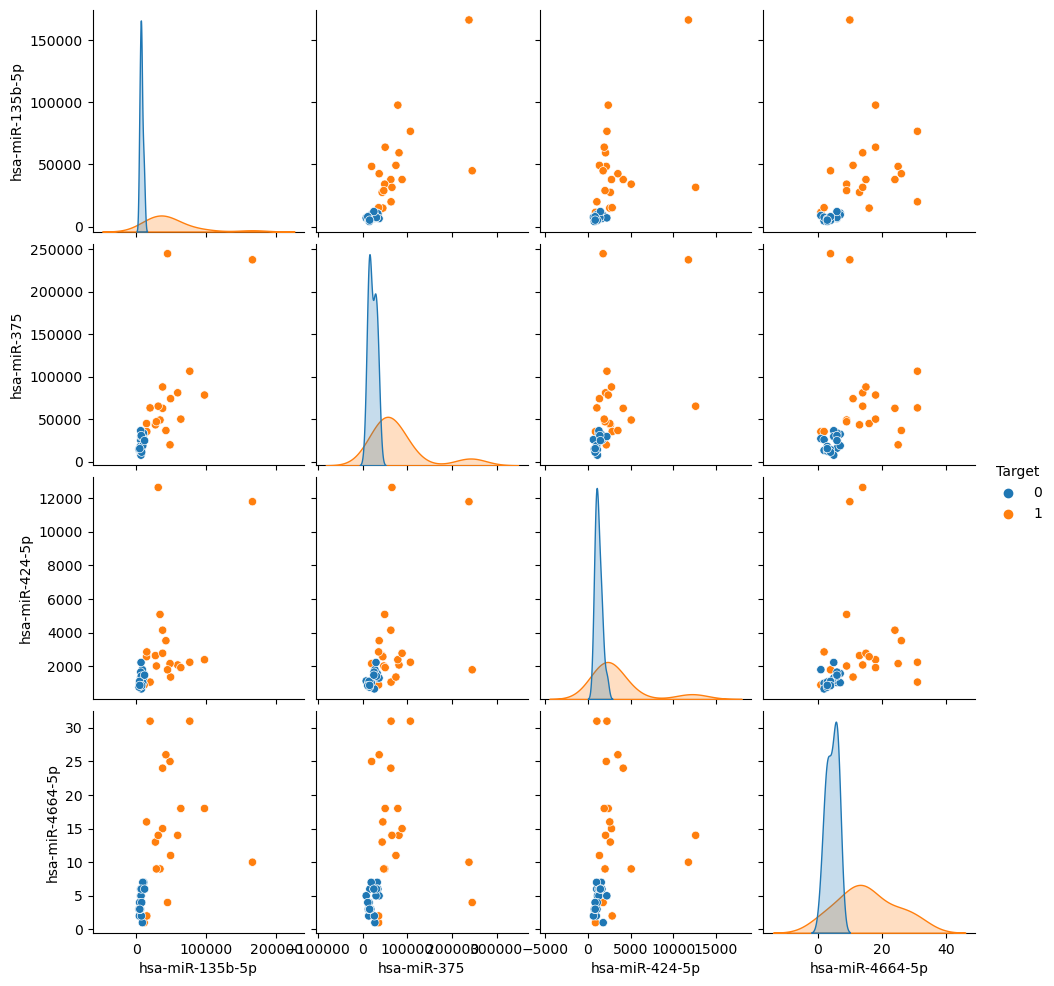

In [346]:
# Define the miRNA columns of interest
miRNA_columns = ["hsa-miR-135b-5p", "hsa-miR-375", "hsa-miR-424-5p","hsa-miR-4664-5p"]

# Add the "Target" column to the selected miRNA columns
columns_of_interest = miRNA_columns + ["Target"]

# Create a pairplot for the selected columns
sns.pairplot(data[columns_of_interest], hue = "Target")

# Show the plot
plt.show()

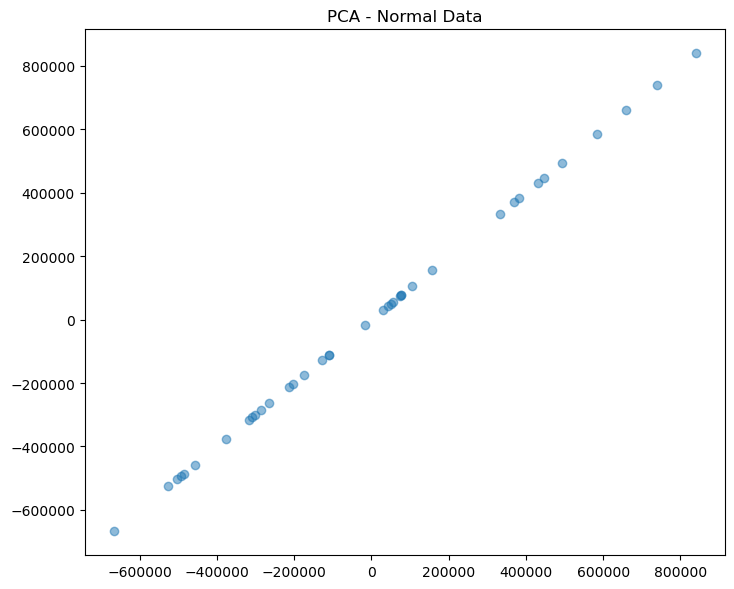

In [347]:
# Perform PCA on the sampled data
pca = PCA(n_components=2)
pca_normal = pca.fit_transform(data)

# Plotting PCA results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_normal[:, 1], pca_normal[:, 1], alpha=0.5)
plt.title('PCA - Normal Data')

plt.tight_layout()
plt.show()

In [342]:
data['Target'].value_counts()

Target
1    19
0    19
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

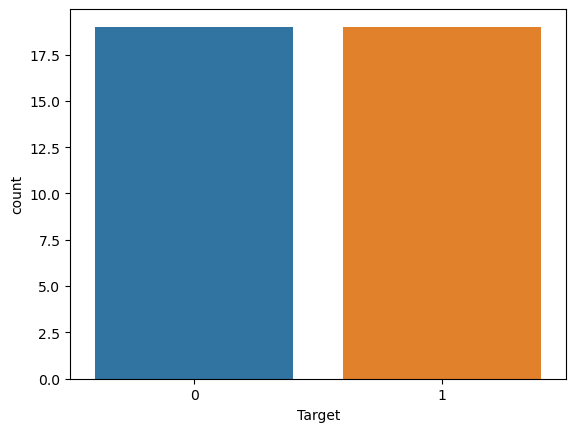

In [63]:
sns.countplot(x = "Target", data = data)

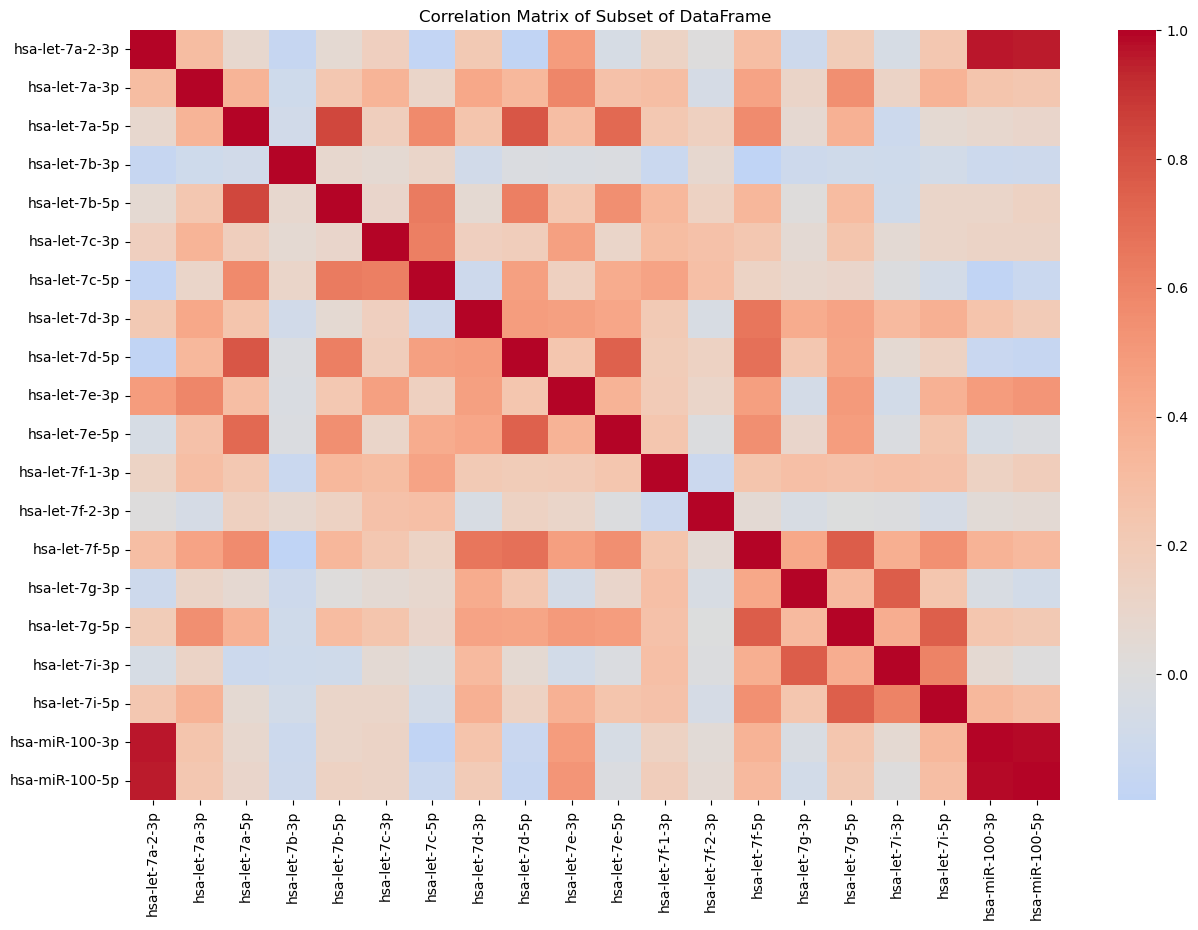

In [349]:
# Select a subset of the data
subset = data.iloc[:, :20]

# Calculate correlation matrix for the subset
corr_matrix = subset.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Subset of DataFrame')
plt.show()

## Outlier detection

Since this is a biological data, every miRNA expression counts. While we'll work on detecting the outliers, we won't drop them. Why?

The variation observed in morphology, physiology, and behavior among individuals has long intrigued researchers in the biological sciences. Although there's recognition of the significance of comprehending the diversity in individual phenotypes, historically, findings considered as outliers or rare occurrences in experiments have typically been disregarded for further investigation. It's essential to shift our perspective on these "outliers" to enhance our grasp of biology. These infrequent events are frequently perceived as problematic or insignificant, yet they could represent genuine rare events or individuals playing a crucial role in driving evolution within a population. (Cook et al., 2021)

However, we'll scale the features to deal with the variance.

In [350]:
# Calculate IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Count outliers
outlier_count = outliers.sum()

# Total number of outliers
total_outliers = outlier_count.sum()

print(f"Number of outliers in each column:\n{outlier_count}")
print(f"\nTotal number of outliers in the DataFrame: {total_outliers}")

Number of outliers in each column:
hsa-let-7a-2-3p    2
hsa-let-7a-3p      0
hsa-let-7a-5p      2
hsa-let-7b-3p      0
hsa-let-7b-5p      0
                  ..
hsa-miR-99a-3p     0
hsa-miR-99a-5p     1
hsa-miR-99b-3p     2
hsa-miR-99b-5p     0
Target             0
Length: 2569, dtype: int64

Total number of outliers in the DataFrame: 4449


## Task 2: Feature engineering 

1.Feature scaling: Feature scaling is the process of standardizing or normalizing the numerical features of a dataset to a similar scale. This ensures that all features contribute equally to the analysis and prevents features with larger scales from dominating the model's learning process.

It's considered feature engineering because it involves modifying or transforming the raw data to improve the performance of machine learning algorithms. By scaling features, we enhance the algorithm's ability to converge faster and produce more accurate predictions.

Feature scaling is crucial because many machine learning algorithms are sensitive to the scale of features. Without proper scaling, models like SVM, KNN, and neural networks might perform poorly or take longer to converge. Additionally, scaling can improve the interpretability of the model's coefficients or weights, making it easier to understand the impact of each feature on the prediction. Overall, feature scaling is an essential preprocessing step in machine learning that helps improve the efficiency and effectiveness of models.

In [351]:
# Separate features (miRNA expression levels) and target variable
X = data.drop(columns=['Target'])  # Features
y = data['Target']  # Target variable

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit the scaler to the features and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features with the target variable
scaled_data = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Save the scaled data to a new Excel file
scaled_file = "ScaledData.xlsx"
scaled_data.to_excel(scaled_file, index=False)
print(f"Scaled data saved to {scaled_file}")

Scaled data saved to ScaledData.xlsx


In [12]:
scaled_data = pd.read_excel("ScaledData.xlsx")
scaled_data.head()

,hsa-let-7a-2-3p,hsa-let-7a-3p,hsa-let-7a-5p,hsa-let-7b-3p,hsa-let-7b-5p,hsa-let-7c-3p,hsa-let-7c-5p,hsa-let-7d-3p,hsa-let-7d-5p,hsa-let-7e-3p,...,hsa-miR-9-5p,hsa-miR-96-3p,hsa-miR-96-5p,hsa-miR-98-3p,hsa-miR-98-5p,hsa-miR-99a-3p,hsa-miR-99a-5p,hsa-miR-99b-3p,hsa-miR-99b-5p,Target
0,1.226667,-0.071984,-0.903305,0.0,-0.646020,-0.702703,-0.903149,-0.490295,-1.970663,-0.513557,...,1.315789,0,1.670089,0,-0.506325,-0.281690,-0.281051,-0.700521,-0.193679,1
1,-0.906667,-0.192607,-0.176814,0.0,-0.059883,-0.648649,-0.689146,1.289720,0.703296,-1.049442,...,0.435407,0,0.073426,0,0.790769,-0.309859,-0.760415,-0.565104,-0.718186,1
2,0.480000,0.749027,-0.149711,0.0,-0.118237,0.540541,0.110536,0.018692,-1.100832,0.028708,...,0.942584,0,0.787666,0,0.516068,0.366197,0.758329,0.325521,-0.149339,1
3,9.173333,0.941634,0.729631,0.0,-0.035495,1.243243,-0.136380,0.563623,-0.523475,0.360447,...,0.062201,0,4.869073,0,0.107521,-0.309859,0.053761,-0.299479,0.226432,1
4,1.706667,1.677043,-0.681594,0.0,-0.024347,0.270270,-0.108813,-0.496046,-0.939797,0.787879,...,0.148325,0,0.260911,0,0.899487,-0.140845,0.279569,0.143229,0.984685,1


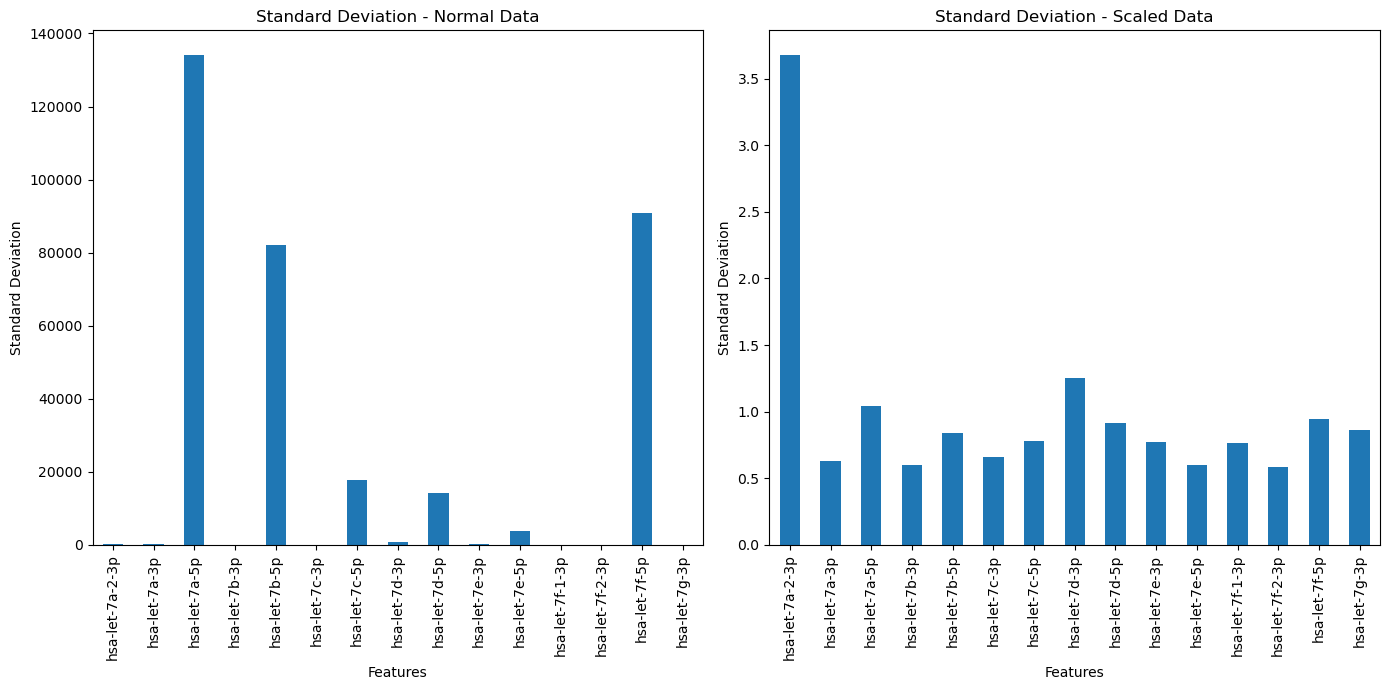

In [352]:
# Select the first 15 columns
num_columns = 15
subset_normal_data = data.iloc[:, :num_columns]
subset_scaled_data = scaled_data.iloc[:, :num_columns]

# Compute standard deviation
std_normal = subset_normal_data.std()
std_scaled = subset_scaled_data.std()

# Plot standard deviation
plt.figure(figsize=(14, 7))

# Plotting the standard deviation before scaling
plt.subplot(1, 2, 1)
std_normal.plot(kind='bar')
plt.title('Standard Deviation - Normal Data')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')

# Plotting the standard deviation after scaling
plt.subplot(1, 2, 2)
std_scaled.plot(kind='bar')
plt.title('Standard Deviation - Scaled Data')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

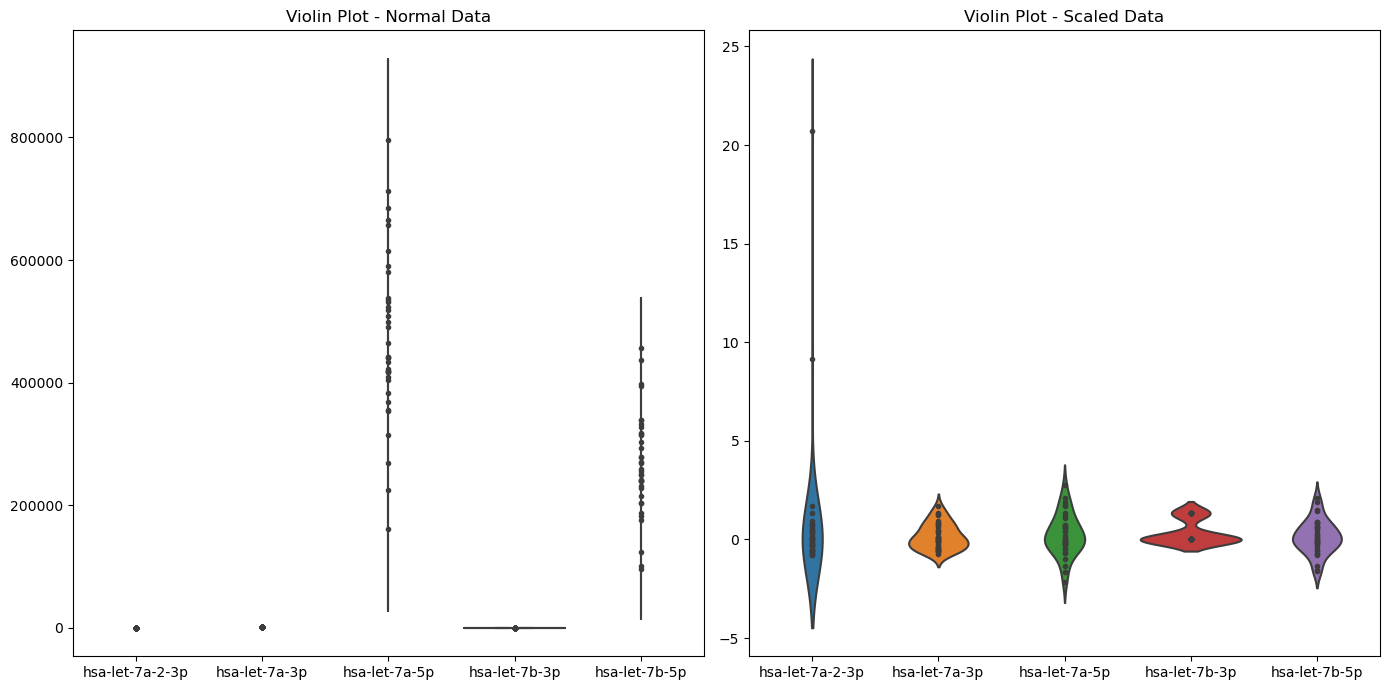

In [353]:
plt.figure(figsize=(14, 7))

num_columns_box = 5
subset_normal_data_box = data.iloc[2:, :num_columns_box]
subset_scaled_data_box = scaled_data.iloc[2:, :num_columns_box]

# Violin plot before scaling
plt.subplot(1, 2, 1)
sns.violinplot(data=subset_normal_data_box, inner="points")
plt.title('Violin Plot - Normal Data')

# Violin plot after scaling
plt.subplot(1, 2, 2)
sns.violinplot(data=subset_scaled_data_box, inner="points")
plt.title('Violin Plot - Scaled Data')

plt.tight_layout()
plt.show()

**2.Feature selection**

Feature selection is the process of choosing a subset of relevant features from the original set of features in a dataset. The goal is to improve model performance by reducing dimensionality, eliminating irrelevant or redundant features, and enhancing interpretability.

It's considered feature engineering because it involves modifying the input data to optimize the performance of machine learning algorithms. By selecting the most informative features, we can simplify the model, reduce overfitting, and improve generalization to new data.

Feature selection is important for several reasons. Firstly, it helps mitigate the curse of dimensionality by reducing the number of features, which can improve computational efficiency and reduce the risk of overfitting, especially with high-dimensional datasets. Secondly, it enhances model interpretability by focusing on the most relevant features, making it easier to understand the underlying relationships between variables and the target outcome.

Feature selection is often performed by checking feature importance, which can be determined through various methods such as statistical tests, correlation analysis, or model-based techniques. By identifying the most important features, we can prioritize them for inclusion in the final model while discarding less relevant ones.

In [343]:
from sklearn.ensemble import RandomForestClassifier

# Extract features (miRNAs) and target variable (disease status)
X = data.drop(columns=['Target'])  # Features
y = data['Target']  # Target variable

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the data
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importance_df)

              Feature  Importance
218   hsa-miR-135b-5p    0.045278
816       hsa-miR-375    0.035040
2434   hsa-miR-769-3p    0.027856
129     hsa-miR-1268a    0.024362
487   hsa-miR-301b-3p    0.023913
...               ...         ...
934      hsa-miR-4268    0.000000
935      hsa-miR-4269    0.000000
936      hsa-miR-4270    0.000000
937      hsa-miR-4271    0.000000
2567   hsa-miR-99b-5p    0.000000

[2568 rows x 2 columns]


## Task 3: Machine Learning Model Development

The splitting of the dataset involves dividing the available data into two or more subsets for training and testing purposes. Typically, the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate the model's performance on unseen data.

The main reason for splitting the dataset is to assess how well the model generalizes to new, unseen data. By training the model on one subset of the data and evaluating it on another, we can estimate how well the model will perform in real-world scenarios where it encounters data it hasn't seen before. This helps prevent overfitting, where the model learns to memorize the training data rather than generalize from it.

In [354]:
# Load the data
data = pd.read_excel('TargetData.xlsx')

# Separate features and target variable
X_normal = data.drop(columns=['Target'], axis=1)
y_normal = data['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normal, y_normal, test_size=0.33, random_state=42, stratify=y_normal)

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_normal_scaled = scaler.transform(X_normal)

### Logistic regression (on full dataset)

In [355]:
# Train Logistic Regression model on the training set
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

# Predict on the entire dataset
y_pred_log_reg = log_reg_model.predict(X_normal_scaled)

# Evaluate
accuracy_log_reg = accuracy_score(y_normal, y_pred_log_reg)
print("Logistic Regression Accuracy (on entire dataset):", accuracy_log_reg)

Logistic Regression Accuracy (on entire dataset): 0.9473684210526315


### SVM (on full dataset)

In [358]:
from sklearn.svm import SVC

# Train SVM model on the training set
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Predict on the entire dataset
y_pred_svm = svm_model.predict(X_normal_scaled)

# Evaluate
accuracy_svm = accuracy_score(y_normal, y_pred_svm)
print("SVM Accuracy (on entire dataset):", accuracy_svm)


SVM Accuracy (on entire dataset): 1.0


### Random forest (on full dataset)

In [360]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model on the training set
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Predict on the entire dataset
y_pred_rf = rf_model.predict(X_normal_scaled)

# Evaluate
accuracy_rf = accuracy_score(y_normal, y_pred_rf)
print("Random Forest Accuracy (on entire dataset):", accuracy_rf)

Random Forest Accuracy (on entire dataset): 0.9736842105263158


### Decision Tree (on full dataset)

In [361]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model on the training set
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

# Predict on the entire dataset
y_pred_dt = dt_model.predict(X_normal_scaled)

# Evaluate
accuracy_dt = accuracy_score(y_normal, y_pred_dt)
print("Decision Tree Accuracy (on entire dataset):", accuracy_dt)

Decision Tree Accuracy (on entire dataset): 0.9210526315789473


### KNN (on full dataset)

In [362]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model on the training set
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Predict on the entire dataset
y_pred_knn = knn_model.predict(X_normal_scaled)

# Evaluate
accuracy_knn = accuracy_score(y_normal, y_pred_knn)
print("KNN Accuracy (on entire dataset):", accuracy_knn)

KNN Accuracy (on entire dataset): 0.5789473684210527


### XGBoost (on full dataset)

In [363]:
from xgboost import XGBClassifier

# Train XGBoost model on the training set
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

# Predict on the entire dataset
y_pred_xgb = xgb_model.predict(X_normal_scaled)

# Evaluate
accuracy_xgb = accuracy_score(y_normal, y_pred_xgb)
print("XGBoost Accuracy (on entire dataset):", accuracy_xgb)

XGBoost Accuracy (on entire dataset): 0.9210526315789473


### Gradient boosting (on full dataset)

In [364]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model on the training set
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)

# Predict on the entire dataset
y_pred_gb = gb_model.predict(X_normal_scaled)

# Evaluate
accuracy_gb = accuracy_score(y_normal, y_pred_gb)
print("Gradient Boosting Accuracy (on entire dataset):", accuracy_gb)

Gradient Boosting Accuracy (on entire dataset): 0.9210526315789473


### Feature selection based on a certain importance threshold 

In [122]:
# Increase the importance threshold 
threshold = 0.02

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature']

# Load the full dataset
full_data = pd.read_excel('TargetData.xlsx')

# Extract only the selected features
selected_data = full_data[selected_features]

# Save the selected features to a new Excel file
selected_data.to_excel('SelectedFeatures.xlsx', index=False)

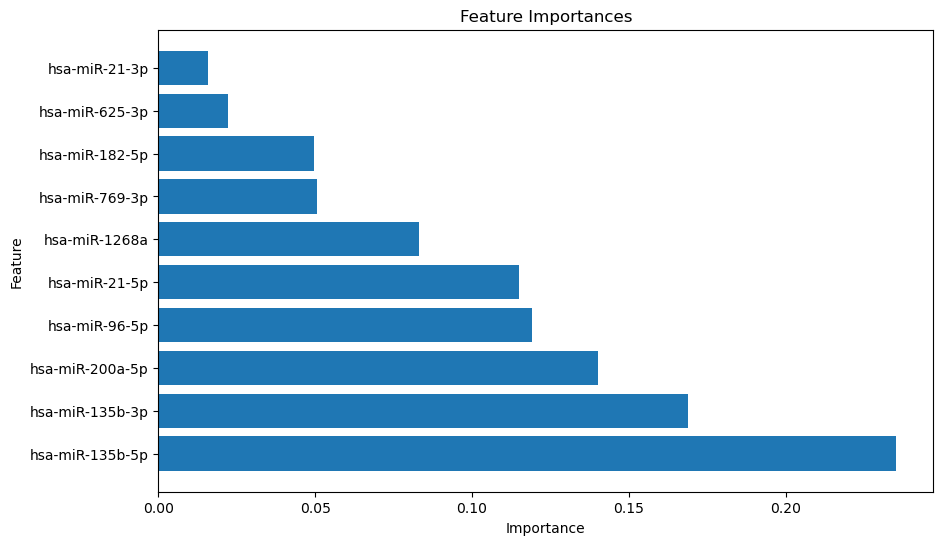

In [365]:
# Load the dataset
selected_data = pd.read_excel('SelectedFeatures.xlsx')

# Extract features (miRNAs) and target variable (disease status)
X = selected_data.drop(columns=['Target'])  # Features
y = selected_data['Target']  # Target variable

X_filtered = X.loc[:, X.columns != 'Samples']

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the data
rf_classifier.fit(X_filtered, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_filtered.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [138]:
selected_data.head()

,hsa-miR-96-5p,hsa-miR-135b-3p,hsa-miR-21-5p,hsa-miR-135b-5p,hsa-miR-769-3p,hsa-miR-21-3p,hsa-miR-182-5p,hsa-miR-1268a,hsa-miR-625-3p,hsa-miR-200a-5p,Target
0,13940,19,1946660,20037,43,4158,8391,414,52,587,1
1,2937,106,1221110,37895,60,3248,5045,365,96,602,1
2,7859,130,944050,59386,43,2472,6050,397,75,585,1
3,35985,299,770939,97651,72,2318,11156,660,90,672,1
4,4229,117,963652,27606,79,3568,5505,753,77,789,1


In [139]:
# Summary statistics
summary_stats = selected_data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       hsa-miR-96-5p  hsa-miR-135b-3p  hsa-miR-21-5p  hsa-miR-135b-5p  \
count      38.000000        38.000000   3.800000e+01        38.000000   
mean     5831.447368        72.342105   5.980687e+05     27650.315789   
std      7415.264278        92.289286   4.630382e+05     32436.953805   
min       781.000000         7.000000   1.269660e+05      4243.000000   
25%      1292.750000        15.000000   2.471548e+05      7180.250000   
50%      2431.000000        24.000000   4.260660e+05     11865.000000   
75%      8184.000000       110.750000   8.720150e+05     37896.500000   
max     35985.000000       464.000000   1.946660e+06    166059.000000   

       hsa-miR-769-3p  hsa-miR-21-3p  hsa-miR-182-5p  hsa-miR-1268a  \
count       38.000000      38.000000       38.000000      38.000000   
mean        48.921053    1535.684211     6146.500000     288.789474   
std         27.719036    1325.164816     6188.504337     234.854199   
min         18.000000      50.000000  

## Task 4: Model Evaluation and Fine-tuning

Fine-tuning involves refining the selected features that have the highest importance in the dataset. This process typically entails focusing on a subset of the original data and re-running the models. By prioritizing the most important features identified through feature selection techniques, we aim to optimize the models' performance and accuracy.

During fine-tuning, we concentrate on iterating through the modeling process, incorporating the refined subset of features. This iterative approach allows us to reassess the effectiveness of the chosen models in light of the refined feature set. By doing so, we can potentially enhance the models' predictive power and efficiency in classification tasks related to cancer detection.

In [366]:
# Load the data
data_sf = pd.read_excel('SelectedFeatures.xlsx')

# Separate features and target variable
X_sf = data_sf.drop(columns=['Target'])
y_sf = data_sf['Target']

# Split the data into training and testing sets
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X_sf, y_sf, test_size=0.33, random_state=42)

# Apply Standard Scaling
scaler_sf = StandardScaler()
X_train_scaled_sf = scaler_sf.fit_transform(X_train_sf)
X_test_scaled_sf = scaler_sf.transform(X_test_sf)
X_sf_scaled = scaler_sf.transform(X_sf)

### Logistic regression (selected features)

In [367]:
# Train Logistic Regression model
log_reg_model_sf = LogisticRegression()
log_reg_model_sf.fit(X_sf_scaled, y_sf)

# Predict on the entire dataset
y_pred_log_reg_sf = log_reg_model_sf.predict(X_sf_scaled)

# Evaluate
accuracy_log_reg_sf = accuracy_score(y_sf, y_pred_log_reg_sf)
print("Logistic Regression Accuracy (on entire dataset):", accuracy_log_reg_sf)

# Confusion matrix
conf_matrix_log_reg_sf = confusion_matrix(y_sf, y_pred_log_reg_sf)

Logistic Regression Accuracy (on entire dataset): 0.9473684210526315


### SVM (selected features)

In [368]:
# Train SVM model
svm_model_sf = SVC()
svm_model_sf.fit(X_train_scaled_sf, y_train_sf)

# Predict on the entire dataset
y_pred_svm_sf = svm_model_sf.predict(X_sf_scaled)

# Evaluate
accuracy_svm_sf = accuracy_score(y_sf, y_pred_svm_sf)
print("SVM Accuracy (on entire dataset):", accuracy_svm_sf)

SVM Accuracy (on entire dataset): 0.9473684210526315


### Random forest classifier (selected features)

In [369]:
# Train Random Forest model
rf_model_sf = RandomForestClassifier()
rf_model_sf.fit(X_train_scaled_sf, y_train_sf)

# Predict on the entire dataset
y_pred_rf_sf = rf_model_sf.predict(X_sf_scaled)

# Evaluate
accuracy_rf_sf = accuracy_score(y_sf, y_pred_rf_sf)
print("Random Forest Accuracy (on entire dataset):", accuracy_rf_sf)

Random Forest Accuracy (on entire dataset): 0.9736842105263158


### Decision Tree (selected features)

In [373]:
# Train Decision Tree model
dt_model_sf = DecisionTreeClassifier()
dt_model_sf.fit(X_train_scaled_sf, y_train_sf)

# Predict on the entire dataset
y_pred_dt_sf = dt_model_sf.predict(X_sf_scaled)

# Evaluate
accuracy_dt_sf = accuracy_score(y_sf, y_pred_dt_sf)
print("Decision Tree Accuracy (on entire dataset):", accuracy_dt_sf)

Decision Tree Accuracy (on entire dataset): 0.9736842105263158


### KNN (selected features)

In [372]:
# Train KNN model
knn_model_sf = KNeighborsClassifier()
knn_model_sf.fit(X_train_scaled_sf, y_train_sf)

# Predict on the entire dataset
y_pred_knn_sf = knn_model_sf.predict(X_sf_scaled)

# Evaluate
accuracy_knn_sf = accuracy_score(y_sf, y_pred_knn_sf)
print("KNN Accuracy (on entire dataset):", accuracy_knn_sf)

KNN Accuracy (on entire dataset): 0.9210526315789473


### XGBoost (selected features)

In [317]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model_sf = XGBClassifier()
xgb_model_sf.fit(X_train_scaled_sf, y_train_sf)

# Predict on the entire dataset
y_pred_xgb_sf = xgb_model_sf.predict(X_sf_scaled)

# Evaluate
accuracy_xgb_sf = accuracy_score(y_sf, y_pred_xgb_sf)
print("XGBoost Accuracy (on entire dataset):", accuracy_xgb_sf)

XGBoost Accuracy (on entire dataset): 0.9736842105263158


### Gradient boosing (selected features)

In [322]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb_model_sf = GradientBoostingClassifier()
gb_model_sf.fit(X_train_scaled_sf, y_train_sf)

# Predict on the entire dataset
y_pred_gb_sf = gb_model_sf.predict(X_sf_scaled)

# Evaluate
accuracy_gb_sf = accuracy_score(y_sf, y_pred_gb_sf)
print("Gradient Boosting Accuracy (on entire dataset):", accuracy_gb_sf)

Gradient Boosting Accuracy (on entire dataset): 0.9736842105263158


### Comparison between the models before and after feature selection

In [374]:
original_scores = {
    'Logistic Regression': accuracy_log_reg,
    'SVM': accuracy_svm,
    'XGBoost': accuracy_xgb,
    'Gradient Boosting': accuracy_gb,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'KNN': accuracy_knn
}

sf_scores = {
    'Logistic Regression': accuracy_log_reg_sf,
    'SVM': accuracy_svm_sf,
    'XGBoost': accuracy_xgb_sf,
    'Gradient Boosting': accuracy_gb_sf,
    'Decision Tree': accuracy_dt_sf,
    'Random Forest': accuracy_rf_sf,
    'KNN': accuracy_knn_sf
}


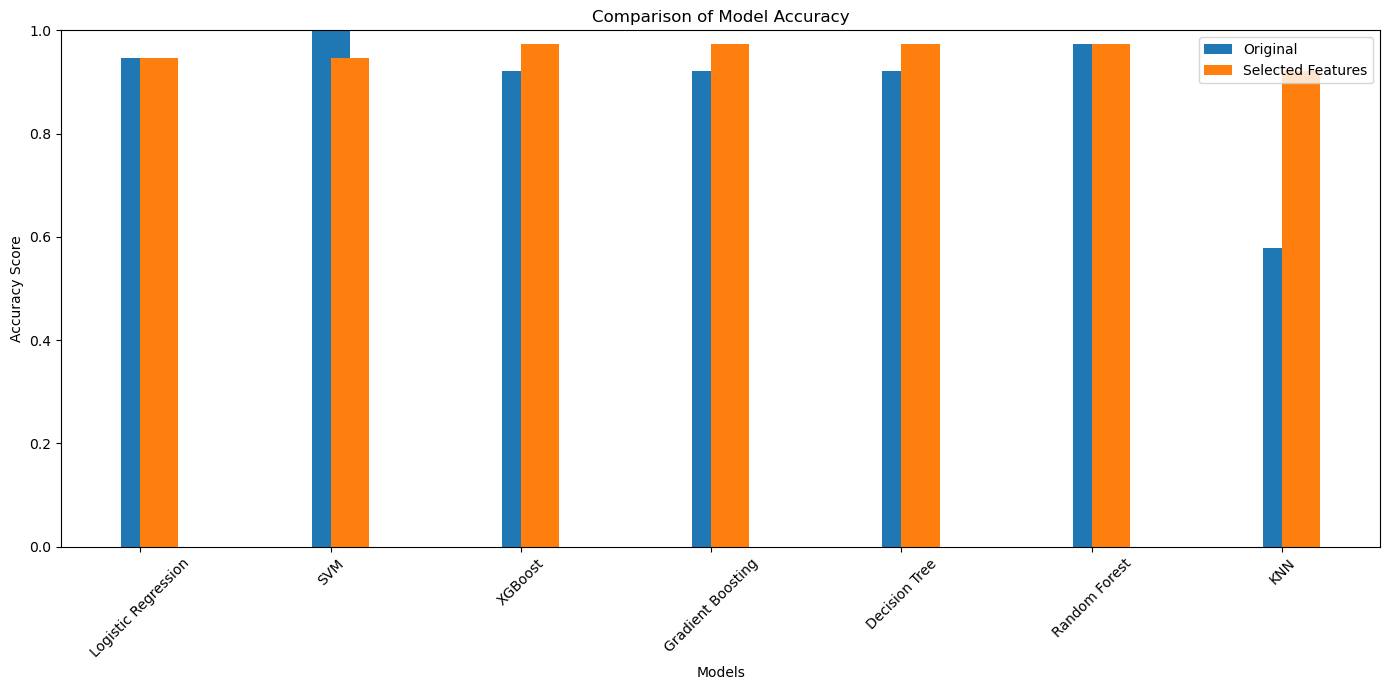

In [375]:
import matplotlib.pyplot as plt

def plot_accuracy_comparison(original_scores, sf_scores):
    models = list(original_scores.keys())  # Get the list of models from original_scores
    original = list(original_scores.values())
    
    # Ensure that sf_scores only contains scores for the same models as in original_scores
    sf_scores = {model: sf_scores[model] for model in models}
    
    selected_features = list(sf_scores.values())

    x = range(len(models))

    plt.figure(figsize=(14, 7))
    plt.bar(x, original, width=0.2, label='Original', align='center')
    plt.bar(x, selected_features, width=0.2, label='Selected Features', align='edge')

    plt.xlabel('Models')
    plt.ylabel('Accuracy Score')
    plt.title('Comparison of Model Accuracy')
    plt.xticks(x, models, rotation=45)
    plt.ylim(0, 1)  # Adjust according to your needs
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the accuracy scores
plot_accuracy_comparison(original_scores, sf_scores)


### Model evaluation

After conducting feature selection and refining the dataset, I identified Random Forest as the best performing model for the task of cancer detection. To further optimize its performance, I employed GridSearch, a technique for hyperparameter tuning.

Through GridSearch, I systematically explored various combinations of hyperparameters within a predefined grid to find the optimal settings that maximize model accuracy. This involved fine-tuning parameters such as the number of trees in the forest, the maximum depth of the trees, and the minimum number of samples required to split a node.

By running GridSearch, I determined the best combination of hyperparameters that significantly improved the model's accuracy. This process provided insights into the most effective configuration for Random Forest in accurately classifying cancer based on miRNA editing expressions.

In [332]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model_sf = RandomForestClassifier()
rf_model_sf.fit(X_train_scaled_sf, y_train_sf)

# Predict on the entire dataset
y_pred_rf_sf = rf_model_sf.predict(X_sf_scaled)

# Evaluate
accuracy_rf_sf = accuracy_score(y_sf, y_pred_rf_sf)
print("Random Forest Accuracy (on entire dataset):", accuracy_rf_sf)

conf_matrix_rf_sf = confusion_matrix(y_sf, y_pred_rf_sf)
print("Confusion Matrix:")
print(conf_matrix_rf_sf)

# Classification report
class_report_rf_sf = classification_report(y_sf, y_pred_rf_sf)
print("Classification Report (before optimization):")
print(class_report_rf_sf)

Random Forest Accuracy (on entire dataset): 0.9736842105263158
Confusion Matrix:
[[19  0]
 [ 1 18]]
Classification Report (before optimization):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.97        19

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.97      0.97      0.97        38



In [328]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_model_sf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled_sf, y_train_sf)

# Print best hyperparameters
print("Best hyperparameters:", grid_search_rf.best_params_)

# Get the best model
best_model_rf = grid_search_rf.best_estimator_

# Predict on the entire dataset
y_pred_rf_sf = best_model_rf.predict(X_sf_scaled)

# Calculate accuracy score
accuracy_rf_sf = accuracy_score(y_sf, y_pred_rf_sf)
print("Random Forest Accuracy (on entire dataset):", accuracy_rf_sf)


Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy (on entire dataset): 0.9736842105263158


### Classification report and confusion matrix

Accuracy represents the proportion of correctly classified instances, precision measures the proportion of true positive predictions among all positive predictions, recall measures the proportion of true positive predictions among all actual positive instances, and F1-score is the harmonic mean of precision and recall, providing a balance between them. Evaluating the models is important to assess their effectiveness in making predictions on unseen data and to identify the best-performing model for deployment in real-world applications.

In [376]:
# Generate classification report
report_rf_sf = classification_report(y_sf, y_pred_rf_sf)

# Print classification report
print("Classification Report (after optimization):")
print(report_rf_sf)

# Generate confusion matrix
conf_matrix_rf_sf = confusion_matrix(y_sf, y_pred_rf_sf)

# Print confusion matrix
print("Confusion Matrix (after optimization):")
print(conf_matrix_rf_sf)

Classification Report (after optimization):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.97        19

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.97      0.97      0.97        38

Confusion Matrix (after optimization):
[[19  0]
 [ 1 18]]


**Note**: Hyperparameter GridSearch might not improve a model's performance already at 97% accuracy due to diminishing returns, computational costs, risks of overfitting, and inherent limitations within the dataset.

## Task 5: Model deployment

I utilized Streamlit, a popular open-source framework in Python for building interactive web applications. Streamlit simplifies the process of creating and sharing data-focused web apps, allowing for seamless integration of machine learning models into user-friendly interfaces.

With Streamlit, I developed a user interface that enables users to interact with the deployed model in a straightforward manner. Users can input relevant data, such as miRNA editing expressions, and receive predictions regarding cancer classification in real-time. Streamlit's intuitive design and simplicity facilitate efficient model deployment, making it accessible to a wider audience without requiring extensive programming knowledge.

In [377]:
import pickle 
filename = "LUAD1.sav"
pickle.dump(rf_model_sf, open(filename,"wb"))

"""import streamlit as st 
import pickle
import pandas as pd 

st.title("Lung Cancer Classification Using miRNA Expressions")
st.info("Please fill out the sections below")
st.sidebar.header("Diagnosis")

# Load the trained model
with open("LUAD.sav", "rb") as file:
    clf = pickle.load(file)

# Input fields
hsa_miR_96_5p = st.text_input('Insert expression for hsa-miR-96-5p')
hsa_miR_135b_3p = st.text_input('Insert expression for hsa-miR-135b-3p')
hsa_miR_21_5p = st.text_input('Insert expression for hsa-miR-21-5p')
hsa_miR_135b_5p = st.text_input('Insert expression for hsa-miR-135b-5p')
hsa_miR_769_39 = st.text_input('Insert expression for hsa-miR-769-3p')
hsa_miR_21_3p = st.text_input('Insert expression for hsa-miR-21-3p')
hsa_miR_182_5p = st.text_input('Insert expression for hsa-miR-182-5p')
hsa_miR_1268a = st.text_input('Insert expression for hsa-miR-1268a')
hsa_miR_625_3p = st.text_input('Insert expression for hsa-miR-625-3p')
hsa_miR_200a_5p = st.text_input('Insert expression for hsa-miR-200a-5p')

# Create a DataFrame with user inputs
dataset = pd.DataFrame({
    'hsa-miR-96-5p': [hsa_miR_96_5p],
    'hsa-miR-135b-3p': [hsa_miR_135b_3p],
    'hsa-miR-21-5p': [hsa_miR_21_5p],
    'hsa-miR-135b-5p': [hsa_miR_135b_5p],
    'hsa-miR-769-39': [hsa_miR_769_39],
    'hsa-miR-21-3p': [hsa_miR_21_3p],
    'hsa-miR-182-5p': [hsa_miR_182_5p],
    'hsa-miR-1268a': [hsa_miR_1268a],
    'hsa-miR-625-3p': [hsa_miR_625_3p],
    'hsa-miR-200a-5p': [hsa_miR_200a_5p]
})

# Prediction button
confirm_button = st.sidebar.button('Confirm')
if confirm_button:
    result = clf.predict(dataset)
    st.write(result)
"""

'import streamlit as st \nimport pickle\nimport pandas as pd \n\nst.title("Lung Cancer Classification Using miRNA Expressions")\nst.info("Please fill out the sections below")\nst.sidebar.header("Diagnosis")\n\n# Load the trained model\nwith open("LUAD.sav", "rb") as file:\n    clf = pickle.load(file)\n\n# Input fields\nhsa_miR_96_5p = st.text_input(\'Insert expression for hsa-miR-96-5p\')\nhsa_miR_135b_3p = st.text_input(\'Insert expression for hsa-miR-135b-3p\')\nhsa_miR_21_5p = st.text_input(\'Insert expression for hsa-miR-21-5p\')\nhsa_miR_135b_5p = st.text_input(\'Insert expression for hsa-miR-135b-5p\')\nhsa_miR_769_39 = st.text_input(\'Insert expression for hsa-miR-769-3p\')\nhsa_miR_21_3p = st.text_input(\'Insert expression for hsa-miR-21-3p\')\nhsa_miR_182_5p = st.text_input(\'Insert expression for hsa-miR-182-5p\')\nhsa_miR_1268a = st.text_input(\'Insert expression for hsa-miR-1268a\')\nhsa_miR_625_3p = st.text_input(\'Insert expression for hsa-miR-625-3p\')\nhsa_miR_200a_5p =

## Results

The Random Forest (RF) algorithm emerged as the most accurate model for this dataset when deployed on the selected features, achieving a high accuracy of 97%. Despite efforts to fine-tune its hyperparameters, including the number of trees and maximum depth, hyperparameter tuning did not yield further improvements in model accuracy. This suggests that the RF model had already reached its maximum predictive capability, with little room for enhancement through hyperparameter optimization. However, it's important to note that while hyperparameter tuning did not lead to a higher accuracy, the RF model's robust performance underscores its effectiveness in handling the intricacies of the dataset and accurately classifying cancer based on miRNA editing expressions. 

Feature selection also played a crucial role in optimizing the performance of the machine learning models. By identifying and selecting the most relevant features, we aimed to reduce dimensionality, improve model interpretability, and potentially enhance predictive accuracy. Through techniques such as feature importance ranking, we identified a subset of features that had the most significant impact on predicting lung adenocarcinoma status based on miRNA editing expressions. This process not only simplified the model complexity but also helped mitigate the risk of overfitting by focusing on the most informative features.


## Conclusion

In conclusion, this study highlights the efficacy of machine learning algorithms in cancer classification based on miRNA editing expressions. Through rigorous model development and evaluation, the Random Forest (RF) algorithm demonstrated superior accuracy when deployed on selected features. This success underscores the potential of RF in effectively handling the complexities of biological data and capturing nuanced patterns for accurate classification. However, it's important to acknowledge that the choice of RF as the best-performing model is specific to this dataset and may not generalize to all scenarios. Future research should continue exploring alternative algorithms and techniques to further enhance predictive performance and uncover additional insights into cancer biology.

## Limitations 

Despite the promising results, this study has several limitations. Firstly, the dataset used for model development consists of a relatively small number of samples, with only 19 diseased and 19 control individuals. This limited sample size may not fully capture the variability present in miRNA expression patterns across different cancer types and patient populations, potentially limiting the generalizability of the findings. Additionally, the small sample size increases the risk of overfitting, where the models may learn patterns specific to the training data but fail to generalize well to unseen data. Future research with larger and more diverse datasets will be essential for validating the robustness and reliability of the developed models. Addressing these limitations through the inclusion of more samples and rigorous cross-validation techniques will be critical for advancing the field of cancer classification using machine learning approaches.

## References

Cook, C. N., Freeman, A. R., Liao, J. C., & Mangiamele, L. A. (2021). The Philosophy of Outliers: Reintegrating Rare Events Into Biological Science. Integrative and Comparative Biology, 61(6), 2191–2198. https://doi.org/10.1093/icb/icab166

Guo, S., Mao, C., Peng, J., Xie, S., Yang, J., Xie, W., Li, W., Yang, H., Guo, H., Zhu, Z., & Zheng, Y. (2024). Improved lung cancer classification by employing diverse molecular features of microRNAs. Heliyon, e26081–e26081. https://doi.org/10.1016/j.heliyon.2024.e26081

Keita Maemura, Watanabe, K., Ando, T., Hiyama, N., Toshio Sakatani, Amano, Y., Kage, H., Nakajima, J., Yutaka Yatomi, Nagase, T., & Takai, D. (2018). Altered editing level of microRNAs is a potential biomarker in lung adenocarcinoma. Cancer Science, 109(10), 3326–3335. https://doi.org/10.1111/cas.13742
